## Machine Learning Classifiers

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

import itertools
from sklearn.metrics import roc_auc_score

import numpy as np

import pandas as pd
import zipfile
import sklearn
import string
import os
import re

In [2]:
DATASET_FILE = 'smsspamcollection.zip'
DATA_PATH = 'data/'
DATA_EXT = '.txt'

In [3]:
with zipfile.ZipFile(DATASET_FILE, 'r') as unzip_file:
    unzip_file.extractall(DATA_PATH)

#### 1. Load Dataset

In [4]:
sms = [sms_data for sms_data in os.listdir(DATA_PATH) if sms_data.endswith(DATA_EXT)]

In [5]:
sms_df = pd.read_csv(DATA_PATH+sms[0], sep='\t', error_bad_lines=False, names= ['Label', 'sms'], encoding= "ISO-8859-1")

In [6]:
sms_df.tail()

Label                                                sms
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ã¼ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

In [7]:
print('Rows x Columns')
display(sms_df.shape)

Rows x Columns


(5572, 2)

#### Quick data exploration

In [8]:
sms_df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [9]:
distribution = sms_df['Label'].value_counts()/sms_df.shape[0]
print(f'data distribution is: \n {distribution}')

data distribution is: 
 ham     0.865937
spam    0.134063
Name: Label, dtype: float64


#### Convert labels to numerical variable

In [10]:
sms_df['Label'] = sms_df.Label.map({'spam':1, 'ham':0})

In [12]:
# Spam is 1
sms_df.tail()

Label                                                sms
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ã¼ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

### Text preprocessing

1. Lowercase
2. Remove digits and punctuation
3. trail whitespaces
4. tokenize

In [13]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def preprocess_text(documents):
    documents = "".join([char for char in documents if char not in string.punctuation and not char.isdigit()])
    clean_docs = " ".join([token for token in documents.split() if not token in stopwords])
    
    return clean_docs


### Modeling

In [14]:
X_d = sms_df.sms
y = sms_df.Label

assert X_d.shape == y.shape

X_trn, X_tst, y_trn, y_tst = train_test_split(X_d, y, random_state=1)
assert X_trn.shape == y_trn.shape
assert X_tst.shape == y_tst.shape

print(f' Size of Training data is {X_trn.shape} \n Size of Test Data: {X_tst.shape}')


 Size of Training data is (4179,) 
 Size of Test Data: (1393,)


In [15]:
# Preprocess and vectorize x_trn and x_tst

vectorizer = CountVectorizer(preprocessor=preprocess_text)
# Features

X_trn_ft = vectorizer.fit_transform(X_trn)
X_tst_ft = vectorizer.transform(X_tst)

In [53]:
logreg = LogisticRegression(class_weight="balanced") #instantiate a logistic regression model
logreg.fit(X_trn_ft, y_trn) #fit the model using training data

#Make predictions on test data
y_pred_class = logreg.predict(X_tst_ft)

Accuracy:  0.9827709978463748


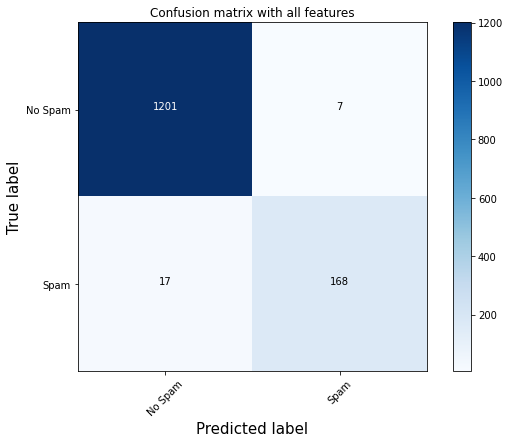

In [55]:
# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
print("Accuracy: ", accuracy_score(y_tst, y_pred_class))

cnf_matrix = confusion_matrix(y_tst, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['No Spam','Spam'],normalize=False,
                      title='Confusion matrix with all features')



In [43]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_tst, y_pred_class))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.91      0.93       185

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [29]:
X_trn[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
X_trn[1]

'Ok lar... Joking wif u oni...'

In [60]:
from sklearn.svm import LinearSVC
vect = CountVectorizer(preprocessor=preprocess_text) 
X_trn_ftm = vect.fit_transform(X_trn)
X_tst_ftm = vect.transform(X_tst)
classifier = LinearSVC(class_weight='balanced')
classifier.fit(X_trn_ftm, y_trn)
y_pred_class_svm = classifier.predict(X_tst_ftm)
print("Accuracy: ", metrics.accuracy_score(y_tst, y_pred_class_svm))

Accuracy:  0.9798994974874372


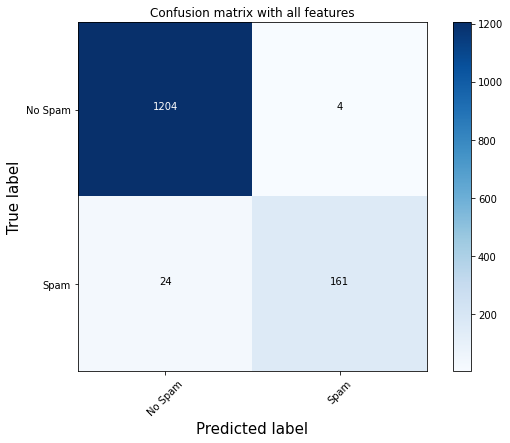

In [59]:
cnf_matrix = confusion_matrix(y_tst, y_pred_class_svm)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['No Spam','Spam'],normalize=False,
                      title='Confusion matrix with all features')

You are waiting for an important email from an unknown source. Let's say from someone who will inform you if you were chosen for a dream job.
Which classifier will you trust in your inbox?